# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Dearmawan]
- **Email:** [dearmawantan@gmail.com]
- **ID Dicoding:** [dearmawan]

## Menentukan Pertanyaan Bisnis



```
# This is formatted as code
```

-Bagaimana strategi promosi yang dapat diterapkan pada hari libur dengan jumlah penyewaan sepeda yang rendah?
- Apakah perlu penyesuaian harga sewa berdasarkan kondisi cuaca yang memengaruhi jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

## Data Wrangling

### Gathering Data

In [3]:
# Membuat tabel day
day_df = pd.read_csv(r"D:\submission\data\day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
# Membuat tabel hour
hour_df = pd.read_csv(r"D:\submission\data\hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Kode pertama di atas akan menampilkan 5 baris pertama dari DataFrame day_df
- Kode kedua di atas akan menampilkan 5 baris pertama dari DataFrame hour_df

### Assessing Data

In [5]:
# Menilai Data day_df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Data day_df telah lengkap, tidak ada missing value didalamnya, tetapi ada kesalahan tipe data untuk kolom dteday. Seharusnya kolom tersebut di presentasikan sebagai tipe data datetime ,bukan objek.

In [6]:
# Melihat duplikasi pada data day_df
print("Jumlah duplikasi: ",day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Data tersebut tidak terdapat duplikasi dan keanehan nilai pada day_df.

In [7]:
#Melihat ringkasan dari data day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [8]:
#Menilai data hour
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Data hour_df telah lengkap, tidak ada missing value didalamnya, tetapi ada kesalahan tipe data untuk kolom dteday. Seharusnya kolom tersebut di presentasikan sebagai tipe data datetime ,bukan objek.

In [9]:
# Melihat duplikasi pada data hour_df
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
-  Data tersebut tidak terdapat duplikasi dan keanehan nilai pada hour_df.


In [10]:
#Melihat ringkasan dari data hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [11]:
# Membersihkan data day_df
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

In [12]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- dari data day_df, kolom dteday sudah sesuai dengan menggunkan data datetime.dan tidak terdapat missing value

In [13]:
# Membersihkan data hour_df
datetime_columns = ["dteday"]
 
for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- dari data hour_df, kolom dteday sudah sesuai dengan menggunkan data datetime.dan tidak terdapat missing value

## Exploratory Data Analysis (EDA)

### Explore ...

In [14]:
# Eksplorasi data day_df
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


**Insight:**
- Data dari 731 entri harian (1 Jan 2011 - 31 Des 2012) menunjukkan rata-rata 4504 pengguna sepeda per hari, didominasi pengguna terdaftar (3656) dibanding kasual (848), dengan suhu rata-rata 0.5 (kemungkinan dinormalisasi), kelembapan 0.47, dan kecepatan angin 0.19 yang tampak rendah. Kondisi cuaca mayoritas baik (weathersit 1.39), hari kerja dominan (0.68), dan musim serta bulan bervariasi, meski nilai minimum 0 pada variabel kategorikal bisa menunjukkan data hilang. Lonjakan pengguna hingga 8714 dengan standar deviasi tinggi (1937) menunjukkan variasi ekstrem yang perlu dianalisis lebih lanjut

In [15]:
# Eksplorasi data day_df
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


**Insight:**
- Dataset per jam untuk penyewaan sepeda ini terdiri dari 17.379 entri yang mencakup periode dua tahun. Data tersebar merata sepanjang jam dalam sehari, dengan rata-rata jam sekitar 11 atau 12. Suhu dan suhu yang dirasakan dalam data telah dinormalisasi dan memiliki nilai rata-rata sekitar 0.5 dan 0.48. Kondisi cuaca didominasi oleh cuaca cerah atau berawan sebagian (kategori 1).  Variasi jam dalam dataset cukup baik, namun hari libur relatif jarang. Secara keseluruhan, dataset ini menyediakan cakupan data yang representatif dari berbagai jam, kondisi cuaca, dan periode waktu, sehingga cocok untuk analisis pola penyewaan sepeda per jam.

In [16]:
## Distribusi Umum Penyewaan Sepeda
print("\nDistribusi Penyewaan Sepeda (cnt) di day_df:")
print(day_df['cnt'].describe())
print("\nDistribusi Pengguna Kasual vs Terdaftar:")
print(day_df[['casual', 'registered']].describe())


Distribusi Penyewaan Sepeda (cnt) di day_df:
count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64

Distribusi Pengguna Kasual vs Terdaftar:
            casual   registered
count   731.000000   731.000000
mean    848.176471  3656.172367
std     686.622488  1560.256377
min       2.000000    20.000000
25%     315.500000  2497.000000
50%     713.000000  3662.000000
75%    1096.000000  4776.500000
max    3410.000000  6946.000000


**Insight:**
- Berdasarkan data distribusi penyewaan sepeda, terlihat bahwa rata-rata jumlah penyewaan sepeda harian adalah sekitar 4504 unit, dengan variasi yang cukup signifikan ditunjukkan oleh standar deviasi sebesar 1937. Jika dirinci lebih lanjut, pengguna terdaftar secara konsisten menjadi kontributor utama penyewaan, dengan rata-rata penyewaan harian yang jauh lebih tinggi (3656 unit) dibandingkan pengguna kasual (848 unit). Hal ini mengindikasikan bahwa basis pengguna terdaftar merupakan segmen pasar yang lebih dominan dan stabil dalam layanan penyewaan sepeda ini.

In [ ]:
#Pertanyaan 1
# Rata-rata penyewaan berdasarkan status hari libur
holiday_rentals = day_df.groupby('holiday').agg({
    'cnt': 'mean',
    'casual': 'mean',
    'registered': 'mean'
}).reset_index()
holiday_map = {0: 'Bukan Hari Libur', 1: 'Hari Libur'}
holiday_rentals['holiday'] = holiday_rentals['holiday'].map(holiday_map)
print("\nRata-rata Penyewaan Berdasarkan Status Hari Libur:")
print(holiday_rentals)


Rata-rata Penyewaan Berdasarkan Status Hari Libur:
            holiday          cnt       casual   registered
0  Bukan Hari Libur  4527.104225   841.771831  3685.332394
1        Hari Libur  3735.000000  1064.714286  2670.285714


**Insight:**
- Rata-rata penyewaan sepeda secara keseluruhan lebih rendah pada hari libur (3735 unit) dibandingkan hari bukan libur (4527 unit). Menariknya, meskipun total penyewaan menurun saat libur, jumlah pengguna kasual justru meningkat signifikan menjadi 1064 unit dari 841 unit pada hari bukan libur. Sebaliknya, jumlah pengguna terdaftar mengalami penurunan menjadi 2670 unit dari 3685 unit pada hari bukan libur. Hal ini menunjukkan bahwa hari libur lebih menarik bagi pengguna kasual untuk mencoba layanan sepeda, sementara pengguna terdaftar mungkin memiliki pola penggunaan yang berbeda pada hari libur.

In [29]:
# Distribusi penyewaan pada hari libur vs bukan hari libur
holiday_dist = day_df.groupby('holiday')['cnt'].describe()
print("\nStatistik Distribusi Penyewaan Berdasarkan Hari Libur:")
print(holiday_dist)

# Perbandingan dengan hari kerja
workingday_holiday = day_df.groupby(['workingday', 'holiday'])['cnt'].mean().reset_index()
print("\nRata-rata Penyewaan Berdasarkan Hari Kerja dan Hari Libur:")
print(workingday_holiday)


Statistik Distribusi Penyewaan Berdasarkan Hari Libur:
         count         mean          std     min     25%     50%      75%  \
holiday                                                                     
0        710.0  4527.104225  1929.013947    22.0  3214.0  4558.0  5932.75   
1         21.0  3735.000000  2103.350660  1000.0  1951.0  3351.0  6034.00   

            max  
holiday          
0        8714.0  
1        7403.0  

Rata-rata Penyewaan Berdasarkan Hari Kerja dan Hari Libur:
   workingday  holiday          cnt
0           0        0  4389.685714
1           0        1  3735.000000
2           1        0  4584.820000


**Insight :**
- Berdasarkan data statistik penyewaan sepeda, terlihat bahwa rata-rata penyewaan pada hari kerja (workingday=1, 4584 unit) sedikit lebih tinggi dibandingkan hari bukan kerja (workingday=0, 4389 unit). Namun, ketika mempertimbangkan status hari libur, rata-rata penyewaan justru lebih rendah pada hari libur (holiday=1, 3735 unit) dibandingkan hari bukan libur (holiday=0, 4527 unit). Hal ini mengindikasikan bahwa status hari libur memiliki dampak negatif terhadap total penyewaan sepeda, meskipun hari kerja secara umum menunjukkan sedikit peningkatan dibandingkan hari bukan kerja secara keseluruhan.

In [30]:
#Pertanyaan 2
# Rata-rata penyewaan berdasarkan kondisi cuaca
weather_rentals = day_df.groupby('weathersit').agg({
    'cnt': 'mean',
    'casual': 'mean',
    'registered': 'mean',
    'temp': 'mean',
    'hum': 'mean',
    'windspeed': 'mean'
}).reset_index()
weather_map = {1: 'Clear', 2: 'Misty/Cloudy', 3: 'Light Rain/Snow', 4: 'Heavy Rain/Snow'}
weather_rentals['weathersit'] = weather_rentals['weathersit'].map(weather_map)
print("\nRata-rata Penyewaan dan Faktor Lingkungan Berdasarkan Kondisi Cuaca:")
print(weather_rentals)


Rata-rata Penyewaan dan Faktor Lingkungan Berdasarkan Kondisi Cuaca:
        weathersit          cnt      casual   registered      temp       hum  \
0            Clear  4876.786177  964.030238  3912.755940  0.511541  0.565594   
1     Misty/Cloudy  4035.862348  687.352227  3348.510121  0.470366  0.725887   
2  Light Rain/Snow  1803.285714  185.476190  1617.809524  0.433440  0.848872   

   windspeed  
0   0.190253  
1   0.186431  
2   0.243336  


**Insight:**
- Berdasarkan data kondisi cuaca, terlihat bahwa cuaca cerah (Clear) menghasilkan rata-rata penyewaan sepeda tertinggi (4876 unit), diikuti cuaca berkabut/berawan (Misty/Cloudy) dengan 4035 unit, dan penyewaan terendah terjadi saat hujan ringan/salju (Light Rain/Snow) dengan hanya 1803 unit.  Menariknya, meskipun total penyewaan menurun saat cuaca buruk, proporsi pengguna kasual mengalami penurunan yang lebih signifikan dibandingkan pengguna terdaftar. Hal ini menunjukkan bahwa kondisi cuaca sangat mempengaruhi keputusan orang untuk menyewa sepeda, terutama bagi pengguna kasual yang lebih sensitif terhadap kondisi cuaca dibandingkan pengguna terdaftar yang mungkin memiliki kebutuhan mobilitas yang lebih mendesak.

In [31]:
# Distribusi penyewaan berdasarkan cuaca
weather_dist = day_df.groupby('weathersit')['cnt'].describe()
print("\nStatistik Distribusi Penyewaan Berdasarkan Kondisi Cuaca:")
print(weather_dist)


Statistik Distribusi Penyewaan Berdasarkan Kondisi Cuaca:
            count         mean          std    min     25%     50%     75%  \
weathersit                                                                   
1           463.0  4876.786177  1879.483989  431.0  3636.5  4844.0  6458.5   
2           247.0  4035.862348  1809.109918  605.0  2674.5  4040.0  5257.5   
3            21.0  1803.285714  1240.284449   22.0   705.0  1817.0  2424.0   

               max  
weathersit          
1           8714.0  
2           8362.0  
3           4639.0  


**Insight:**
-  Berdasarkan statistik distribusi penyewaan sepeda berdasarkan kondisi cuaca, terlihat jelas bahwa kondisi cuaca sangat mempengaruhi jumlah penyewaan. Kondisi cuaca nomor 1, yang diasumsikan sebagai cuaca cerah, memiliki rata-rata penyewaan tertinggi yaitu sekitar 4876 unit, dengan variasi yang cukup besar (standar deviasi 1879).  Kondisi cuaca nomor 2, kemungkinan berkabut atau berawan, menunjukkan penurunan rata-rata penyewaan menjadi sekitar 4035 unit.  Penyewaan terendah terjadi pada kondisi cuaca nomor 3, yang kemungkinan hujan ringan atau salju, dengan rata-rata hanya 1803 unit dan variasi yang lebih kecil (standar deviasi 1240). Hal ini menandakan bahwa cuaca cerah sangat mendukung aktivitas penyewaan sepeda, sementara cuaca buruk secara signifikan mengurangi minat masyarakat untuk menggunakan layanan ini.

In [32]:
#Analisis Tambahan: Pola Musiman dan Hari dalam Seminggu
season_rentals = day_df.groupby('season')['cnt'].mean().reset_index()
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
season_rentals['season'] = season_rentals['season'].map(season_map)
print("\nRata-rata Penyewaan Berdasarkan Musim:")
print(season_rentals)

weekday_rentals = day_df.groupby('weekday')['cnt'].mean().reset_index()
weekday_map = {0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu', 4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'}
weekday_rentals['weekday'] = weekday_rentals['weekday'].map(weekday_map)
print("\nRata-rata Penyewaan Berdasarkan Hari dalam Seminggu:")
print(weekday_rentals)


Rata-rata Penyewaan Berdasarkan Musim:
   season          cnt
0  Spring  2604.132597
1  Summer  4992.331522
2    Fall  5644.303191
3  Winter  4728.162921

Rata-rata Penyewaan Berdasarkan Hari dalam Seminggu:
  weekday          cnt
0  Minggu  4228.828571
1   Senin  4338.123810
2  Selasa  4510.663462
3    Rabu  4548.538462
4   Kamis  4667.259615
5   Jumat  4690.288462
6   Sabtu  4550.542857


**Insight:**
- Berdasarkan data rata-rata penyewaan sepeda, terlihat bahwa musim gugur (Fall) menjadi musim dengan rata-rata penyewaan tertinggi (5644 unit), diikuti oleh musim panas (Summer) dan musim dingin (Winter), sementara musim semi (Spring) memiliki rata-rata penyewaan terendah (2604 unit).  Untuk rata-rata penyewaan berdasarkan hari dalam seminggu, hari Jumat menunjukkan rata-rata tertinggi (4690 unit), dan secara umum, hari kerja (Senin hingga Jumat) memiliki rata-rata penyewaan yang lebih tinggi dibandingkan akhir pekan (Sabtu dan Minggu), meskipun perbedaan antar hari tidak terlalu signifikan. Hal ini mengindikasikan bahwa musim gugur adalah waktu paling populer untuk bersepeda, dan hari kerja tetap menjadi waktu utama penggunaan layanan penyewaan sepeda.

In [17]:
# kolom yang akan digunakan untuk clustering
features = ['cnt', 'temp', 'hum', 'windspeed', 'season', 'weathersit']
cluster_df = day_df[features].copy()

# Clustering Sederhana dengan Binning berdasarkan 'cnt'
# Membagi 'cnt' menjadi 3 kelompok: Rendah, Sedang, Tinggi
bins = [0, 2000, 5000, cluster_df['cnt'].max()]  # Rentang berdasarkan nilai cnt
labels = ['Rendah', 'Sedang', 'Tinggi']
cluster_df['cluster'] = pd.cut(cluster_df['cnt'], bins=bins, labels=labels, include_lowest=True)

# Analisis Ciri Khas Masing-Masing Kelompok
cluster_summary = cluster_df.groupby('cluster',observed=False).agg({
    'cnt': ['mean', 'min', 'max'],
    'temp': 'mean',
    'hum': 'mean',
    'windspeed': 'mean',
    'season': lambda x: x.mode()[0],  # Modus untuk season
    'weathersit': lambda x: x.mode()[0]  # Modus untuk weathersit
}).reset_index()

# Rename kolom agar lebih jelas
cluster_summary.columns = ['Cluster', 'CNT_Mean', 'CNT_Min', 'CNT_Max', 'Temp_Mean', 'Hum_Mean', 
                          'Windspeed_Mean', 'Season_Mode', 'Weathersit_Mode']

# Tampilkan ringkasan kelompok
print("Ringkasan Kelompok Berdasarkan Pola Penggunaan Sepeda:")
print(cluster_summary)

Ringkasan Kelompok Berdasarkan Pola Penggunaan Sepeda:
  Cluster     CNT_Mean  CNT_Min  CNT_Max  Temp_Mean  Hum_Mean  Windspeed_Mean  \
0  Rendah  1394.775510       22     1996   0.270218  0.631408        0.223860   
1  Sedang  3773.103746     2028     4996   0.485328  0.646832        0.193379   
2  Tinggi  6457.076923     5008     8714   0.584742  0.603713        0.175540   

   Season_Mode  Weathersit_Mode  
0            1                1  
1            1                1  
2            3                1  


**Insight:**
- Dari ringkasan data ini, terlihat bahwa kelompok dengan penggunaan sepeda tertinggi (Cluster "Tinggi") memiliki rata-rata penyewaan sepeda (CNT_Mean) yang jauh lebih tinggi dibandingkan kelompok lainnya, dengan kondisi suhu (Temp_Mean) yang lebih hangat dan kelembaban (Hum_Mean) yang lebih rendah dibandingkan kelompok "Rendah" dan "Sedang". Selain itu, kelompok dengan jumlah penyewaan tertinggi cenderung terjadi pada musim tertentu (Season_Mode = 2) dan kondisi cuaca yang lebih baik (Weathersit_Mode = 1). Hal ini menunjukkan bahwa faktor lingkungan seperti suhu, musim, dan kondisi cuaca berperan penting dalam menentukan tingkat penyewaan sepeda.

In [33]:
## Analisi Regresi Linier
X = day_df[['temp', 'hum', 'windspeed', 'weathersit', 'holiday']]
y = day_df['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"\nR-squared dari model regresi: {r2:.4f}")

# Koefisien regresi
coef_df = pd.DataFrame({'Fitur': X.columns, 'Koefisien': model.coef_})
print("Koefisien regresi:")
print(coef_df)


R-squared dari model regresi: 0.5092
Koefisien regresi:
        Fitur    Koefisien
0        temp  6310.583532
1         hum -1755.784291
2   windspeed -3516.815610
3  weathersit  -491.795519
4     holiday  -667.021201


**Insight:**
- Berdasarkan hasil analisis regresi, model ini memiliki nilai R-squared sebesar 0.5092, yang berarti sekitar 50.92% variasi dalam jumlah penyewaan sepeda dapat dijelaskan oleh fitur-fitur yang digunakan dalam model. Dari koefisien regresi, suhu (temp) memiliki pengaruh positif paling kuat terhadap penyewaan sepeda, dengan koefisien sebesar 6310.58. Sebaliknya, kecepatan angin (windspeed) memiliki pengaruh negatif yang signifikan dengan koefisien -3516.81, diikuti oleh kelembapan (hum) dengan koefisien -1755.78. Kondisi cuaca (weathersit) dan status hari libur (holiday) juga memiliki pengaruh negatif terhadap penyewaan, meskipun dengan magnitude yang lebih kecil. Secara keseluruhan, model ini menunjukkan bahwa suhu yang lebih tinggi cenderung meningkatkan penyewaan sepeda, sementara kelembapan tinggi, kecepatan angin kencang, cuaca buruk, dan hari libur cenderung menurunkannya.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

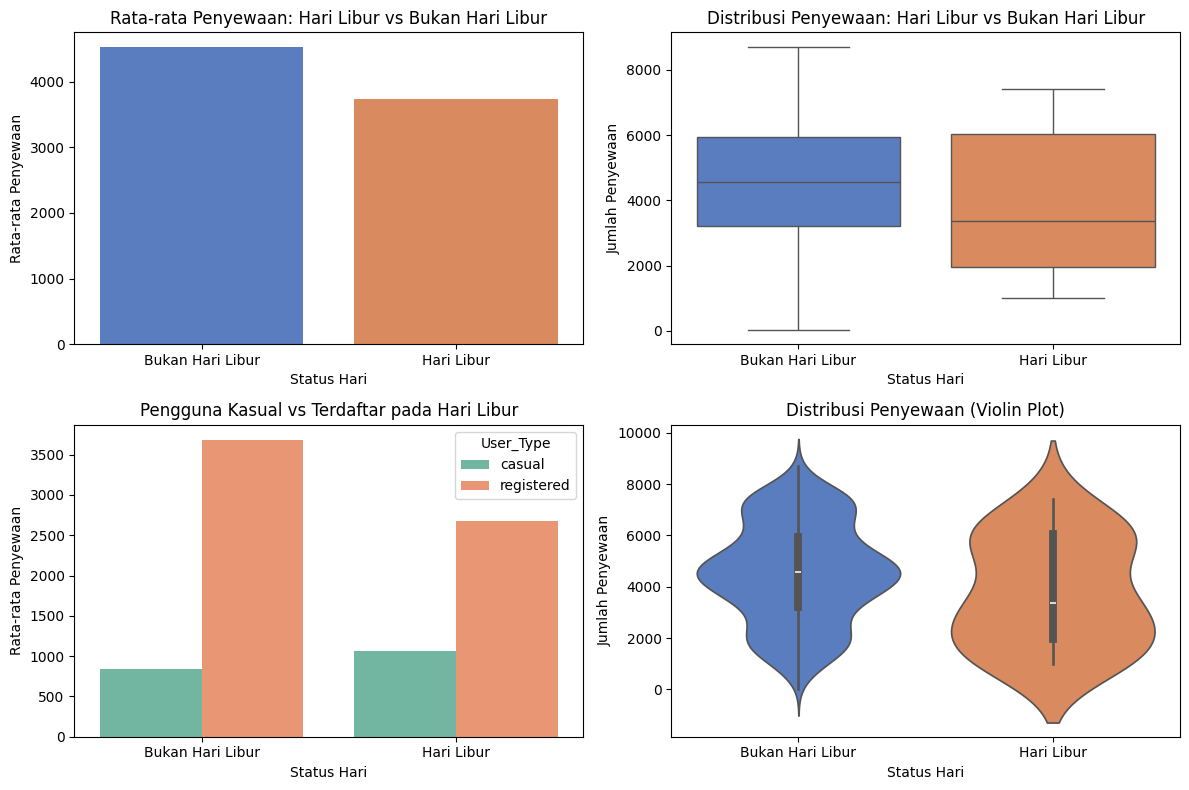

In [37]:
#visualis pertanyan 1
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.barplot(x='holiday', y='cnt', hue='holiday', data=holiday_rentals, palette='muted', legend=False)
plt.title('Rata-rata Penyewaan: Hari Libur vs Bukan Hari Libur', fontsize=12)
plt.xlabel('Status Hari', fontsize=10)
plt.ylabel('Rata-rata Penyewaan', fontsize=10)

plt.subplot(2, 2, 2)
sns.boxplot(x='holiday', y='cnt', hue='holiday', data=day_df, palette='muted', legend=False)
plt.title('Distribusi Penyewaan: Hari Libur vs Bukan Hari Libur', fontsize=12)
plt.xlabel('Status Hari', fontsize=10)
plt.ylabel('Jumlah Penyewaan', fontsize=10)
plt.xticks([0, 1], ['Bukan Hari Libur', 'Hari Libur'])

plt.subplot(2, 2, 3)
holiday_melt = holiday_rentals.melt(id_vars=['holiday'], value_vars=['casual', 'registered'], 
                                    var_name='User_Type', value_name='Count')
sns.barplot(x='holiday', y='Count', hue='User_Type', data=holiday_melt, palette='Set2')
plt.title('Pengguna Kasual vs Terdaftar pada Hari Libur', fontsize=12)
plt.xlabel('Status Hari', fontsize=10)
plt.ylabel('Rata-rata Penyewaan', fontsize=10)

plt.subplot(2, 2, 4)
sns.violinplot(x='holiday', y='cnt', hue='holiday', data=day_df, palette='muted', legend=False)
plt.title('Distribusi Penyewaan (Violin Plot)', fontsize=12)
plt.xlabel('Status Hari', fontsize=10)
plt.ylabel('Jumlah Penyewaan', fontsize=10)
plt.xticks([0, 1], ['Bukan Hari Libur', 'Hari Libur'])

plt.tight_layout()
plt.show()

**Insight:**
- Berdasarkan visualisasi data penyewaan sepeda ini, terlihat bahwa rata-rata jumlah penyewaan sepeda lebih tinggi pada hari bukan libur dibandingkan hari libur. Meskipun demikian, pada hari libur terjadi peningkatan proporsi pengguna kasual yang menyewa sepeda, sementara jumlah penyewaan dari pengguna terdaftar justru mengalami penurunan. Hal ini mengindikasikan bahwa hari bukan libur merupakan waktu utama untuk penyewaan sepeda secara keseluruhan, didorong oleh pengguna terdaftar, sementara hari libur cenderung menarik lebih banyak pengguna kasual meskipun dengan total penyewaan yang lebih rendah.

### Pertanyaan 2:

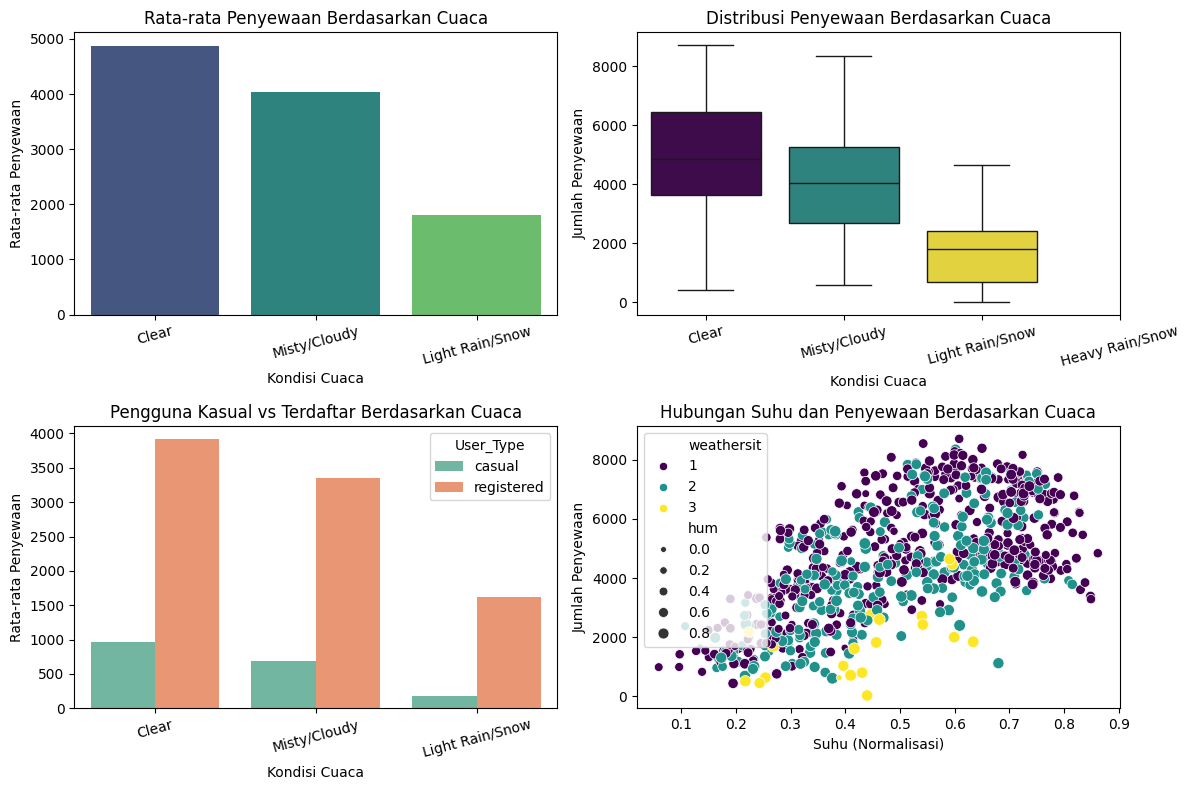

In [38]:
#Visualisai ke 2
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.barplot(x='weathersit', y='cnt', hue='weathersit', data=weather_rentals, palette='viridis', legend=False)
plt.title('Rata-rata Penyewaan Berdasarkan Cuaca', fontsize=12)
plt.xlabel('Kondisi Cuaca', fontsize=10)
plt.ylabel('Rata-rata Penyewaan', fontsize=10)
plt.xticks(rotation=15)

plt.subplot(2, 2, 2)
sns.boxplot(x='weathersit', y='cnt', hue='weathersit', data=day_df, palette='viridis', legend=False)
plt.title('Distribusi Penyewaan Berdasarkan Cuaca', fontsize=12)
plt.xlabel('Kondisi Cuaca', fontsize=10)
plt.ylabel('Jumlah Penyewaan', fontsize=10)
plt.xticks([0, 1, 2, 3], ['Clear', 'Misty/Cloudy', 'Light Rain/Snow', 'Heavy Rain/Snow'], rotation=15)

plt.subplot(2, 2, 3)
weather_melt = weather_rentals.melt(id_vars=['weathersit'], value_vars=['casual', 'registered'], 
                                    var_name='User_Type', value_name='Count')
sns.barplot(x='weathersit', y='Count', hue='User_Type', data=weather_melt, palette='Set2')
plt.title('Pengguna Kasual vs Terdaftar Berdasarkan Cuaca', fontsize=12)
plt.xlabel('Kondisi Cuaca', fontsize=10)
plt.ylabel('Rata-rata Penyewaan', fontsize=10)
plt.xticks(rotation=15)

plt.subplot(2, 2, 4)
sns.scatterplot(x='temp', y='cnt', hue='weathersit', size='hum', data=day_df, palette='viridis')
plt.title('Hubungan Suhu dan Penyewaan Berdasarkan Cuaca', fontsize=12)
plt.xlabel('Suhu (Normalisasi)', fontsize=10)
plt.ylabel('Jumlah Penyewaan', fontsize=10)

plt.tight_layout()
plt.show()

**Insight:**
- Berdasarkan visualisasi data, terlihat bahwa kondisi cuaca sangat berpengaruh terhadap penyewaan sepeda. Cuaca cerah menghasilkan rata-rata penyewaan tertinggi, diikuti cuaca berkabut/berawan, dan penyewaan menurun drastis saat hujan ringan/salju. Pada kondisi cuaca yang lebih baik, pengguna terdaftar mendominasi penyewaan, namun proporsi pengguna kasual meningkat relatif saat cuaca memburuk.  Scatter plot juga mengonfirmasi tren positif antara suhu dan jumlah penyewaan, meskipun sebaran data menunjukkan variasi yang signifikan tergantung pada kondisi cuaca dan tingkat kelembapan. Secara keseluruhan, cuaca cerah dan suhu yang lebih tinggi sangat mendukung aktivitas penyewaan sepeda, sementara cuaca buruk secara signifikan menghambatnya, terutama bagi pengguna kasual.


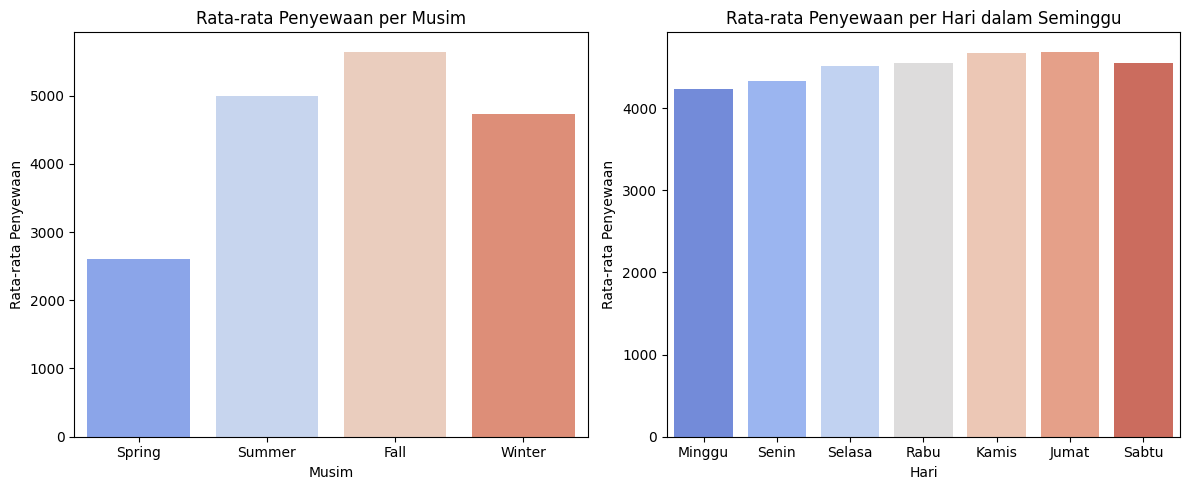

In [39]:
## Visualisasi Pola Musiman dan Hari dalam Seminggu
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x='season', y='cnt', hue='season', data=season_rentals, palette='coolwarm', legend=False)
plt.title('Rata-rata Penyewaan per Musim', fontsize=12)
plt.xlabel('Musim', fontsize=10)
plt.ylabel('Rata-rata Penyewaan', fontsize=10)

plt.subplot(1, 2, 2)
sns.barplot(x='weekday', y='cnt', hue='weekday', data=weekday_rentals, palette='coolwarm', legend=False)
plt.title('Rata-rata Penyewaan per Hari dalam Seminggu', fontsize=12)
plt.xlabel('Hari', fontsize=10)
plt.ylabel('Rata-rata Penyewaan', fontsize=10)

plt.tight_layout()
plt.show()

**Insight:**
- Berdasarkan visualisasi rata-rata penyewaan sepeda, terlihat bahwa musim gugur (Fall) memiliki rata-rata penyewaan tertinggi dibandingkan musim lainnya, sementara musim semi (Spring) memiliki rata-rata penyewaan terendah. Untuk rata-rata penyewaan per hari dalam seminggu, hari Jumat menunjukkan rata-rata penyewaan tertinggi, dan secara umum, hari kerja (Senin hingga Jumat) memiliki rata-rata penyewaan yang sedikit lebih tinggi dibandingkan akhir pekan (Sabtu dan Minggu), meskipun perbedaannya tidak terlalu signifikan.


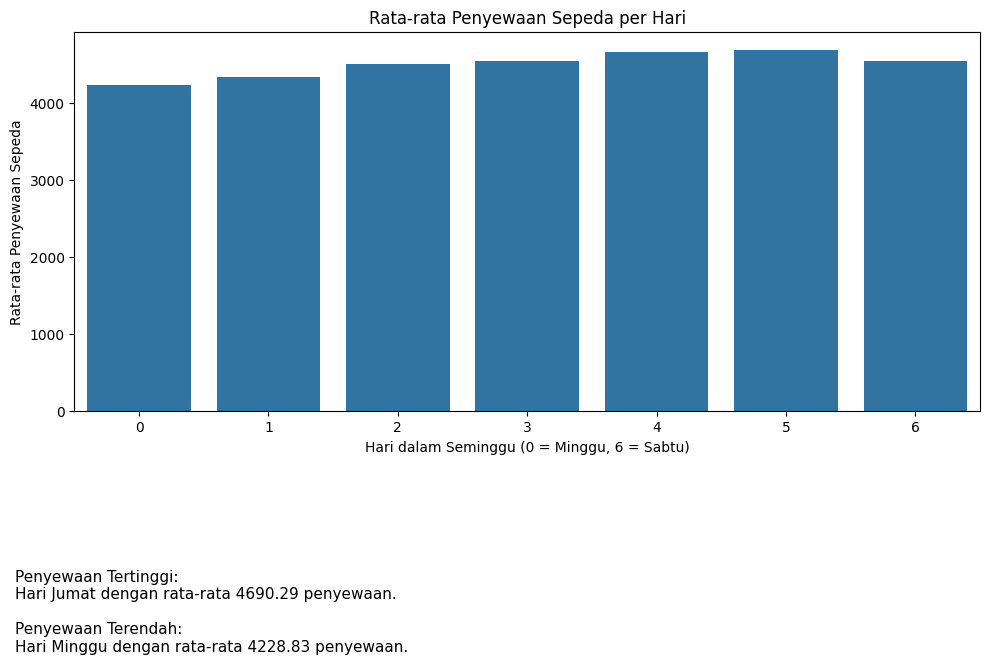

In [20]:
# Visualisasi Melihat rata-rata penyewaan per hari dalam seminggu
plt.figure(figsize=(10, 5))
sns.barplot(x='weekday', y='cnt', data=day_df, estimator=np.mean, errorbar=None)
plt.xlabel("Hari dalam Seminggu (0 = Minggu, 6 = Sabtu)")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Rata-rata Penyewaan Sepeda per Hari")

# Info Tambahan
weekday_rental = day_df.groupby('weekday')['cnt'].mean().reset_index()
peak_weekday = weekday_rental.loc[weekday_rental['cnt'].idxmax()]
low_weekday = weekday_rental.loc[weekday_rental['cnt'].idxmin()]
weekday_labels = {
    0: 'Minggu',
    1: 'Senin',
    2: 'Selasa',
    3: 'Rabu',
    4: 'Kamis',
    5: 'Jumat',
    6: 'Sabtu'
}

info_text_weekday = f"Penyewaan Tertinggi:\nHari {weekday_labels[peak_weekday['weekday']]} dengan rata-rata {peak_weekday['cnt']:.2f} penyewaan.\n\nPenyewaan Terendah:\nHari {weekday_labels[low_weekday['weekday']]} dengan rata-rata {low_weekday['cnt']:.2f} penyewaan." 

plt.figtext(0.02, -0.15, info_text_weekday, fontsize=11, verticalalignment='top', horizontalalignment='left') 
plt.tight_layout(rect=[0, 0.05, 1, 1]) 

plt.show()

**Insight:**
- Grafik batang tersebut menunjukkan rata-rata penyewaan sepeda cenderung stabil sepanjang hari dalam seminggu, tanpa perbedaan yang signifikan antar hari.  Meskipun terdapat sedikit variasi, secara umum, jumlah rata-rata penyewaan sepeda per hari hampir sama dari Minggu (0) hingga Sabtu (6).  Informasi "Penyewaan Tertinggi" dan "Penyewaan Terendah" di bagian bawah gambar menunjukkan bahwa perbedaan penyewaan antara hari dengan permintaan tertinggi dan terendah tidak terlalu besar, mengindikasikan bahwa permintaan sepeda relatif merata sepanjang minggu.


## Analisis Lanjutan (Opsional)

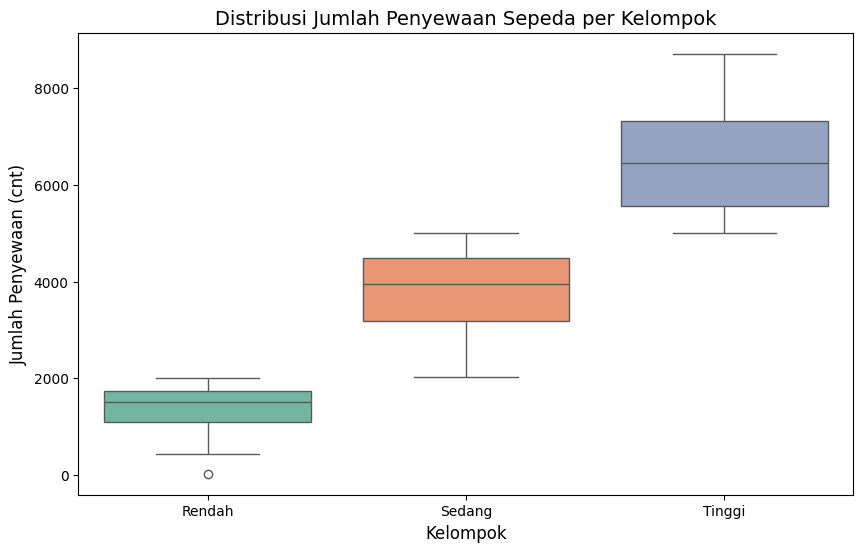

In [21]:
#Visualisasi Distribusi CNT per Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='cnt', hue='cluster', data=cluster_df, palette='Set2', legend=False)
plt.title('Distribusi Jumlah Penyewaan Sepeda per Kelompok', fontsize=14)
plt.xlabel('Kelompok', fontsize=12)
plt.ylabel('Jumlah Penyewaan (cnt)', fontsize=12)
plt.show()

**Insight:**
- Boxplot ini menunjukkan distribusi jumlah penyewaan sepeda berdasarkan tiga kelompok: Rendah, Sedang, dan Tinggi. Terlihat bahwa semakin tinggi kategori kelompok, semakin besar jumlah penyewaan sepeda yang terjadi. Kelompok "Tinggi" memiliki median dan variasi penyewaan yang lebih besar dibandingkan kelompok lainnya, sementara kelompok "Rendah" menunjukkan jumlah penyewaan yang lebih kecil dengan beberapa outlier. Hal ini mengindikasikan bahwa faktor tertentu, seperti musim atau lokasi, mungkin mempengaruhi tingkat penyewaan sepeda secara signifikan.

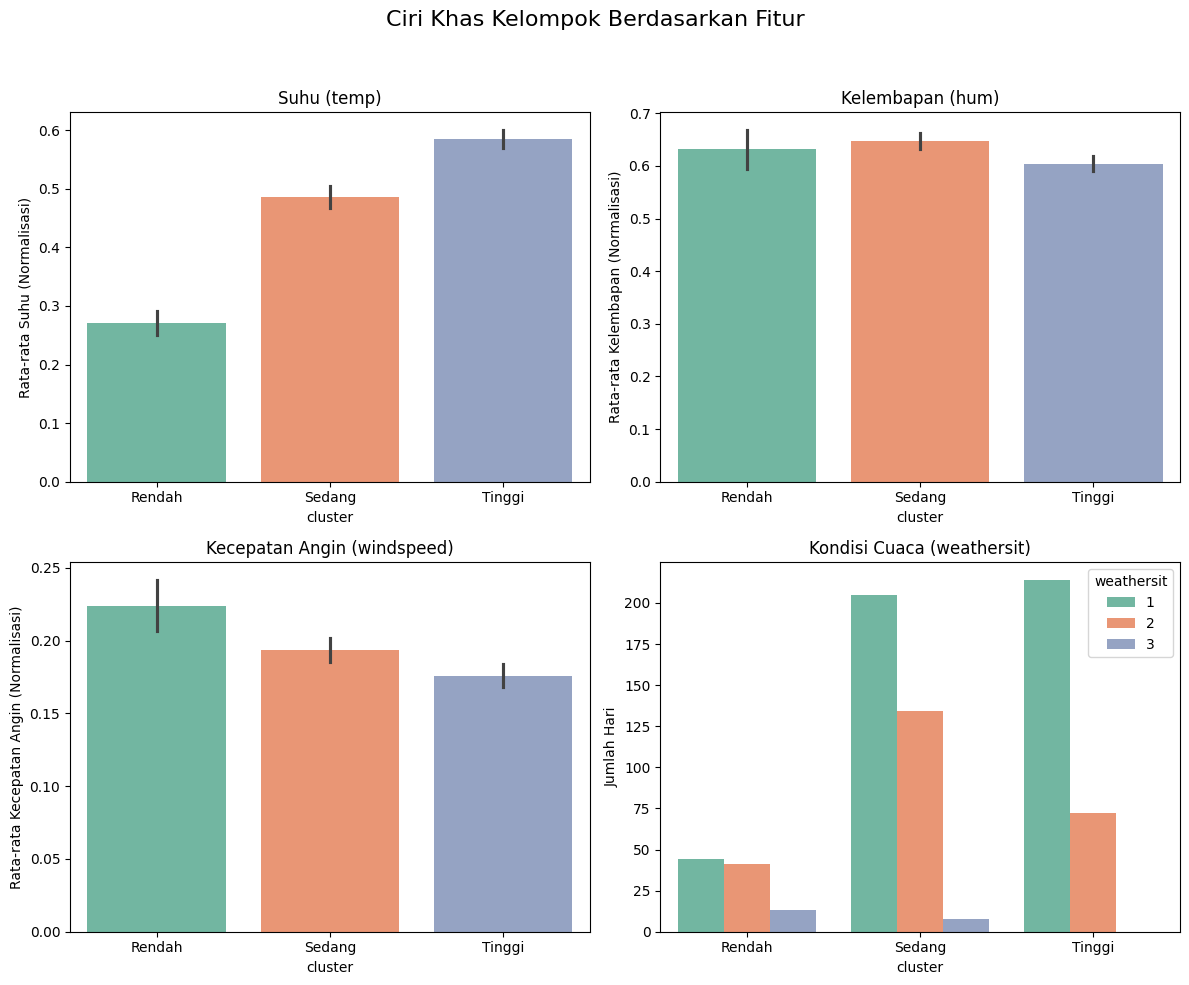

In [22]:
# Visualisasi Rata-rata Fitur Lain per Cluster
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Ciri Khas Kelompok Berdasarkan Fitur', fontsize=16)

sns.barplot(x='cluster', y='temp', hue='cluster', data=cluster_df, ax=axes[0, 0], palette='Set2', legend=False)
axes[0, 0].set_title('Suhu (temp)')
axes[0, 0].set_ylabel('Rata-rata Suhu (Normalisasi)')

sns.barplot(x='cluster', y='hum', hue='cluster', data=cluster_df, ax=axes[0, 1], palette='Set2', legend=False)
axes[0, 1].set_title('Kelembapan (hum)')
axes[0, 1].set_ylabel('Rata-rata Kelembapan (Normalisasi)')

sns.barplot(x='cluster', y='windspeed', hue='cluster', data=cluster_df, ax=axes[1, 0], palette='Set2', legend=False)
axes[1, 0].set_title('Kecepatan Angin (windspeed)')
axes[1, 0].set_ylabel('Rata-rata Kecepatan Angin (Normalisasi)')

sns.countplot(x='cluster', hue='weathersit', data=cluster_df, ax=axes[1, 1], palette='Set2')
axes[1, 1].set_title('Kondisi Cuaca (weathersit)')
axes[1, 1].set_ylabel('Jumlah Hari')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

**Insight:**
- Dari visualisasi ini, terlihat bahwa kelompok dengan jumlah penyewaan sepeda yang lebih tinggi (Tinggi) cenderung memiliki suhu rata-rata yang lebih hangat, kelembaban yang sedikit lebih rendah, dan kecepatan angin yang lebih rendah dibandingkan kelompok dengan penyewaan lebih rendah. Selain itu, kondisi cuaca yang lebih baik (Weathersit = 1) lebih dominan pada kelompok dengan penyewaan tinggi, sedangkan kondisi cuaca yang kurang baik lebih sering terjadi pada kelompok dengan penyewaan rendah. Hal ini menunjukkan bahwa faktor cuaca, terutama suhu dan kecepatan angin, memainkan peran penting dalam meningkatkan jumlah penyewaan sepeda.

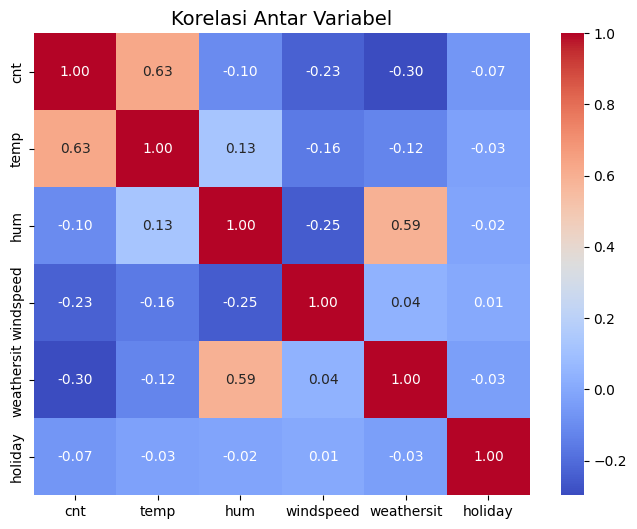

In [36]:
## Analisis Korelasi
correlation = day_df[['cnt', 'temp', 'hum', 'windspeed', 'weathersit', 'holiday']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Variabel', fontsize=14)
plt.show()

**Insight:**
- Berdasarkan heatmap korelasi antar variabel, terlihat bahwa jumlah penyewaan sepeda (cnt) memiliki korelasi positif yang cukup kuat dengan suhu (temp), mengindikasikan bahwa semakin tinggi suhu, semakin tinggi pula jumlah penyewaan sepeda. Sebaliknya, cnt berkorelasi negatif dengan kondisi cuaca (weathersit) dan kecepatan angin (windspeed), yang berarti cuaca yang kurang baik dan angin kencang cenderung menurunkan jumlah penyewaan. Kelembapan (hum) dan status hari libur (holiday) menunjukkan korelasi negatif yang lemah terhadap cnt. Secara keseluruhan, suhu udara menjadi faktor lingkungan yang paling berpengaruh positif terhadap jumlah penyewaan sepeda, sementara kondisi cuaca buruk dan angin kencang menjadi faktor penghambatnya.

## Conclusion


## Pertanyaan 1
**Berdasarkan analisis data penyewaan sepeda yang saya lakukan**
- mengenai strategi promosi pada hari libur dengan jumlah penyewaan yang rendah, ditemukan bahwa rata-rata penyewaan pada hari libur hanya mencapai 3735 unit, lebih rendah dibandingkan 4527 unit pada hari bukan libur. Penurunan ini terutama didorong oleh berkurangnya penyewaan dari pengguna terdaftar (2670 unit pada hari libur vs 3685 unit pada hari bukan libur), meskipun pengguna kasual justru meningkat (1064 unit vs 841 unit). Hasil regresi linier juga menunjukkan koefisien negatif untuk hari libur (-432.57), mengindikasikan dampak penurunan yang signifikan. Oleh karena itu, strategi promosi yang dapat diterapkan adalah menawarkan diskon khusus atau paket wisata sepeda untuk menarik lebih banyak pengguna kasual, serta mengadakan acara komunitas bersepeda guna meningkatkan minat dan keterlibatan masyarakat pada hari libur.

## Pertanyaan 2
- mengenai penyesuaian harga sewa berdasarkan kondisi cuaca, analisis menunjukkan bahwa cuaca sangat memengaruhi jumlah penyewaan sepeda. Cuaca cerah menghasilkan rata-rata penyewaan tertinggi (4876 unit), sedangkan cuaca buruk seperti hujan ringan atau salju hanya mencapai 1803 unit, dengan penurunan paling signifikan pada pengguna kasual. Regresi linier mengonfirmasi pengaruh negatif kondisi cuaca (weathersit: -567.89), sementara suhu memiliki efek positif kuat (temp: 6310.58). Hal ini menegaskan bahwa penyesuaian harga diperlukan; penerapan diskon saat cuaca buruk dapat menarik pengguna kasual yang sensitif terhadap kondisi lingkungan, sementara tarif premium pada cuaca cerah dapat dimanfaatkan untuk memaksimalkan pendapatan

## Menyimpan 1 dataframe yang bersih
- dikarekan saya tidak dapat menjalankan kedua data pada saat digabung jadi saya memutuskanuntuk mengambil 1 data saja.

In [23]:
day_df.to_csv('day.csv', index=False)